In [1]:
import random
from rlagents import MCAgent
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook, tqdm
%matplotlib inline

## TuringLearner
Can a Reinforcement Agent learn to perform right shift using a Turing Machine?

Turing machines represent a powerful class of computing machines. The Human input to those machines is that part of the machine which contains it's 'programming'. Namely the part which says what action to take.

In [2]:
from rlagents import __version__
__version__

(0, 0, 8)

In [3]:
actions = ['<', '>', 'r', 'w', 'stop']
agent = MCAgent(actions)
print(agent)

In [4]:
def make_obs(tape, head):
    return [tape[head], head]

In [9]:
data = []
trials_ = 100
eps_ = 5*1000
maxno = 10
with tqdm(total=trials_*eps_) as pbar:
    for trial in range(trials_):
        agent.reset()
        for episode in range(eps_):
            a, b = int(random.random()*maxno), int(random.random()*maxno)
            c = a // 2
            tape = ['0'] + list(bin(a)[2:])
            head, cache = 0, '0'
            while True:
                obs = make_obs(tape, head)
                act = agent.get_action(obs)
                done = False
                if act == '<':
                    head = max(0, head - 1)
                elif act == '>':
                    head = min(len(tape)-1, head+1)
                elif act == 'r':
                    cache = tape[head]
                elif act == 'w':
                    tape[head] = cache
                elif act == 'stop':
                    done = True
                b = int(''.join(tape), 2) 
                rew = 1 if b == c else 0
                agent.observe_reward(rew)
                if done:
                    break
            agent.end_episode()
            data.append((episode, rew, trial))
            pbar.update(1)

100%|██████████| 500000/500000 [01:16<00:00, 6545.75it/s] 


## Take a look at the results

In [11]:
df = pd.DataFrame(data, columns=['ep', 'rew', 'trial'])

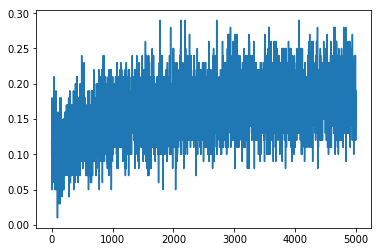

In [12]:
d = list(sorted(dict(df.groupby('ep')['rew'].mean()).items()))
x = [i[0] for i in d]
y = [i[1] for i in d]
plt.plot(x, y)